In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from dataclasses import dataclass, field, asdict
import argparse

from AOUP import Parameter, AOUP

In [2]:
parameter = Parameter(
    N_particle = 10000,
    N_ensemble = 10,
    velocity = 1.0,
    Lambda = 1.0,
    boundary = 5.0,
    N_bins = 20,
    gamma = 1.0,
    slope = 1.0,
    temperature = 1.0,
    tau = 1.0,
    Da = 1.0,
    delta_t = 0.01,
    initial = 1000,
    sampling = 1000,
)

print(parameter)

Parameter(N_particle=10000, N_ensemble=10, velocity=1.0, Lambda=1.0, boundary=5.0, N_bins=20, gamma=1.0, slope=1.0, temperature=1.0, tau=1.0, Da=1.0, delta_t=0.01, initial=1000, sampling=1000)


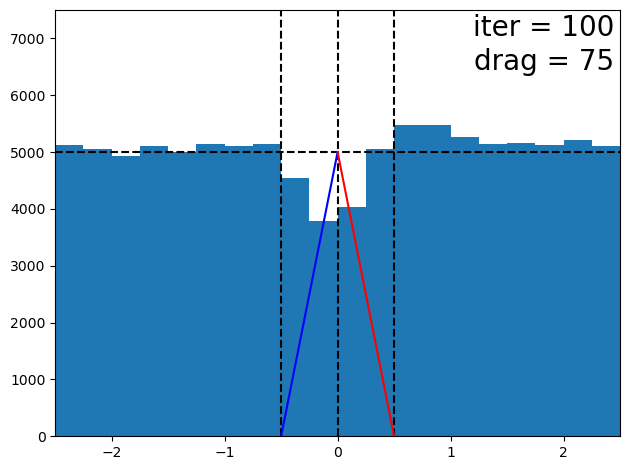

In [3]:
aoup = AOUP(parameter)
aoup.animation()